In [83]:
##########################################
### Principal Component Analysis (PCA) ###
##########################################
# install.packages("")


## load libraries
library(ggplot2)
library(ggfortify)
library(GGally)
library(e1071)
library(class)
library(psych)
library(readr)
library(caret)

In [19]:
## read dataset
wine <- read_csv("lab4/wine_data.csv", col_names = FALSE, show_col_types = FALSE)

## set column names
names(wine) <- c("Type","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid Phenols","Proanthocyanins","Color Intensity","Hue","Od280/od315 of diluted wines","Proline")

## inspect data frame
head(wine)

Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Od280/od315 of diluted wines,Proline
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


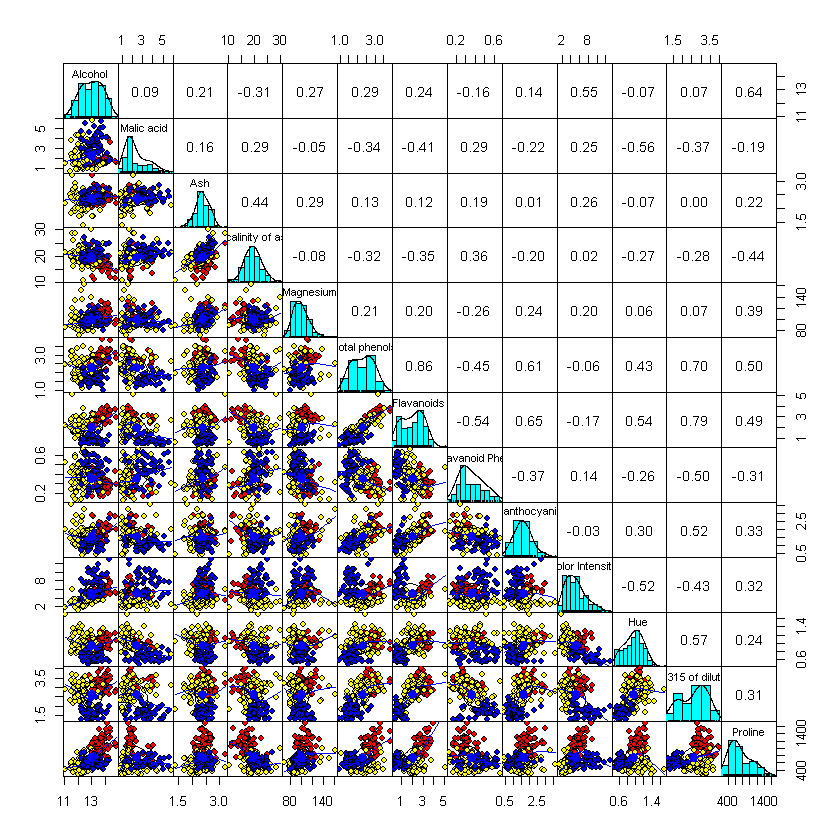

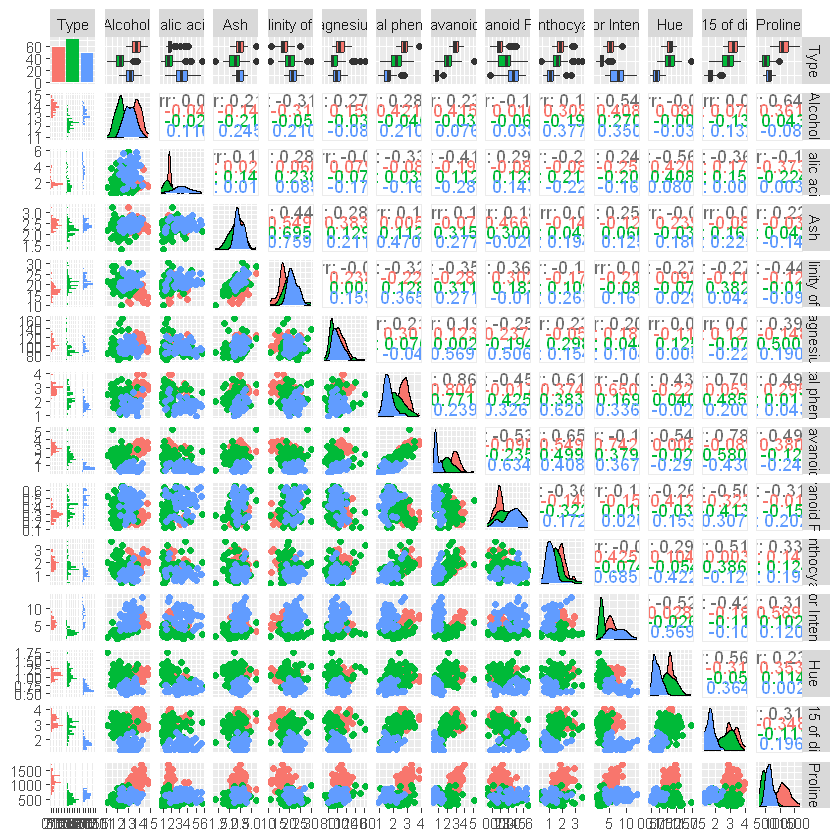

In [21]:
## change the data type of the "Type" column from character to factor
####
# Factors look like regular strings (characters) but with factors R knows 
# that the column is a categorical variable with finite possible values
# e.g. "Type" in the Wine dataset can only be 1, 2, or 3
####

wine$Type <- as.factor(wine$Type)


## visualize variables
pairs.panels(wine[,-1],gap = 0,bg = c("red", "yellow", "blue")[wine$Type],pch=21)

ggpairs(wine, ggplot2::aes(colour = Type))

###

In [85]:
# Remove class column before PCA
wine.features <- wine[ , -1] # remove type
# wine.features

# Compute PCA using princomp 
wine.pca <- princomp(wine.features, cor = TRUE, scores = TRUE)

# Display PCA summary 
summary(wine.pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.1692972 1.5801816 1.2025273 0.9586313 0.92370351
Proportion of Variance 0.3619885 0.1920749 0.1112363 0.0706903 0.06563294
Cumulative Proportion  0.3619885 0.5540634 0.6652997 0.7359900 0.80162293
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.80103498 0.74231281 0.59033665 0.53747553 0.50090167
Proportion of Variance 0.04935823 0.04238679 0.02680749 0.02222153 0.01930019
Cumulative Proportion  0.85098116 0.89336795 0.92017544 0.94239698 0.96169717
                          Comp.11    Comp.12     Comp.13
Standard deviation     0.47517222 0.41081655 0.321524394
Proportion of Variance 0.01736836 0.01298233 0.007952149
Cumulative Proportion  0.97906553 0.99204785 1.000000000

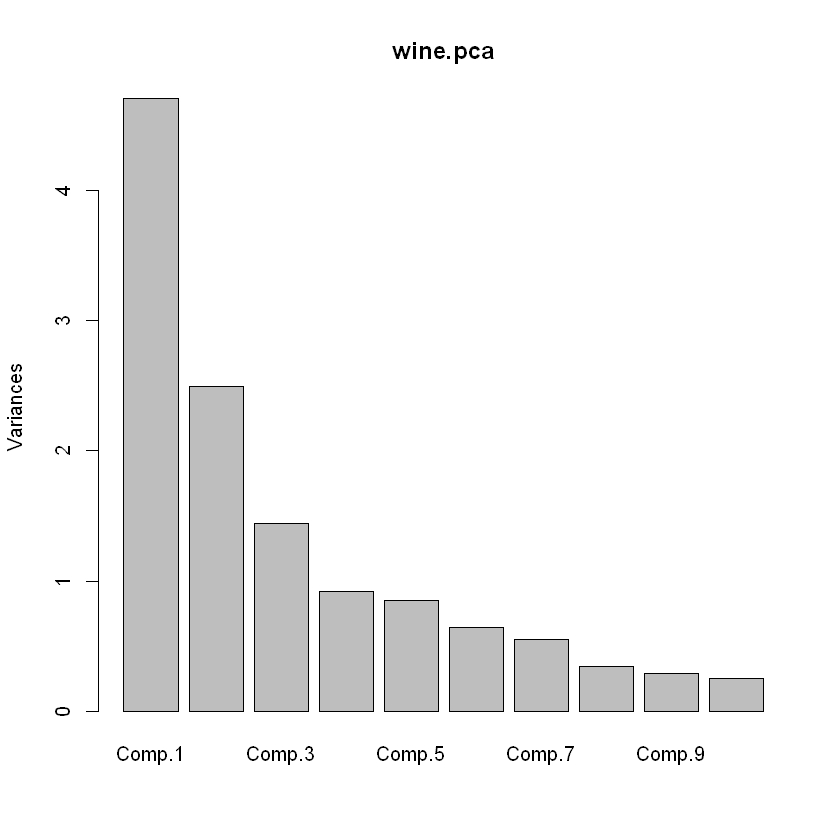

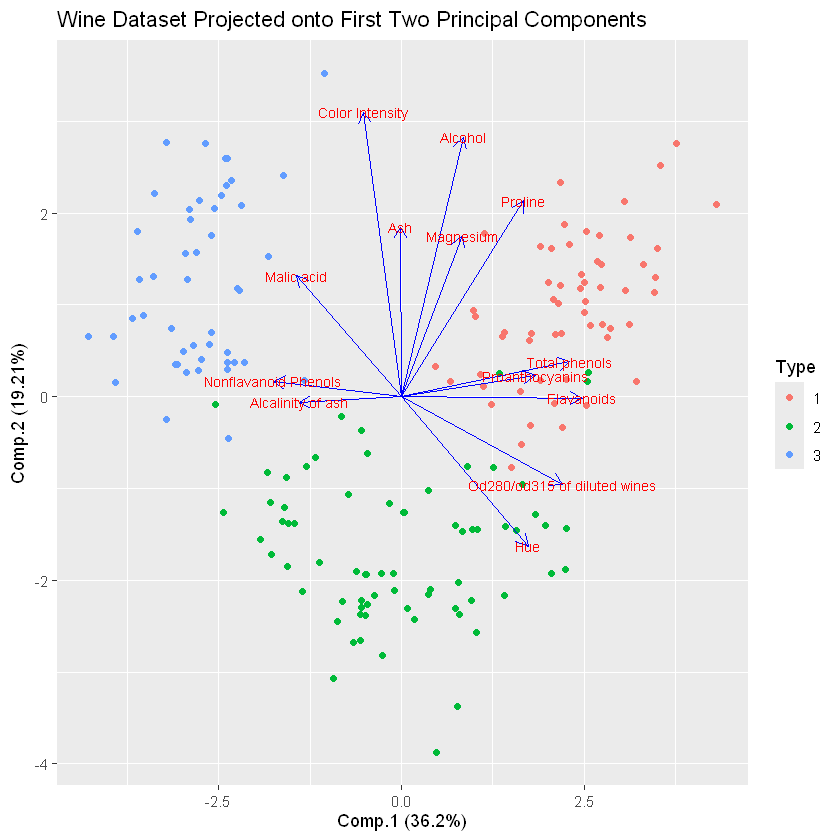

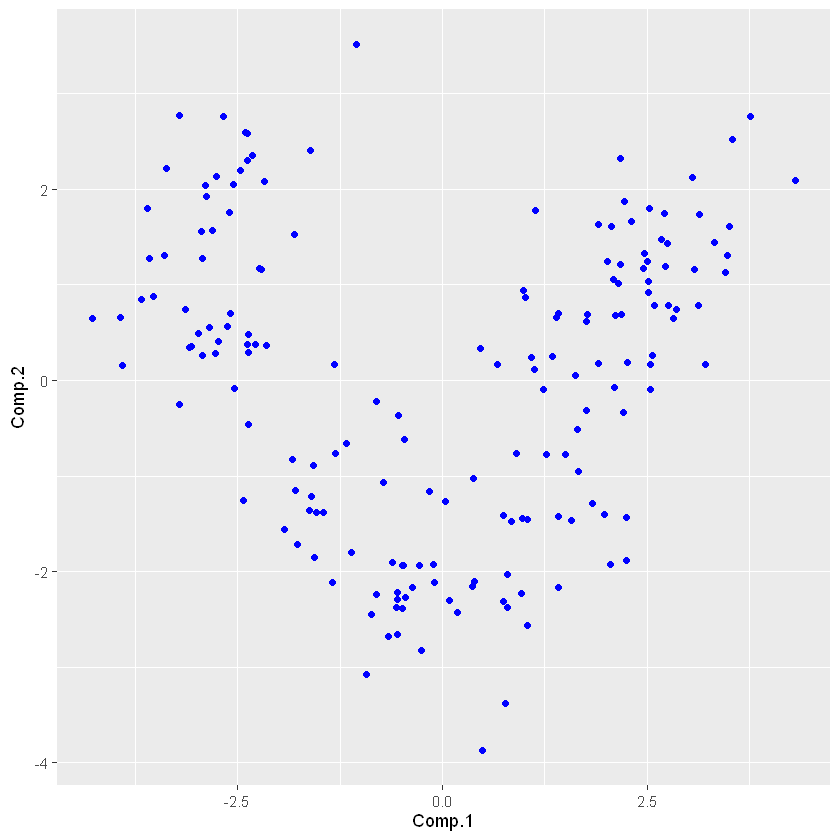

In [35]:
# plot
plot(wine.pca)

## using autoplot() function to plot 1st + 2nd components
autoplot(wine.pca, data = wine, colour = 'Type',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3, scale = 0) + 
  ggtitle("Wine Dataset Projected onto First Two Principal Components")

## scatter plot of dataset in PCs
ggplot(wine.pca$scores, aes(x = Comp.1, y = Comp.2)) + geom_point(color="blue")


In [39]:
# Identify variables that contribute most to PC1 and PC2

# Loadings show how each original variable contributes to each PC
loadings <- wine.pca$loadings[, 1:2]
loadings

# Identify top 5 contributors to PC1 and PC2
abs.loadings <- abs(loadings)
top_PC1 <- sort(abs.loadings[,1], decreasing = TRUE)[1:5]
top_PC2 <- sort(abs.loadings[,2], decreasing = TRUE)[1:5]

cat("\nTop 5 variables contributing to PC1:\n")
print(names(top_PC1))
cat("\nTop 5 variables contributing to PC2:\n")
print(names(top_PC2))

,Comp.1,Comp.2
Alcohol,0.144329395,0.483651548
Malic acid,-0.245187580,0.224930935
Ash,-0.002051061,0.316068814
Alcalinity of ash,-0.239320405,-0.010590502
Magnesium,0.141992042,0.299634003
Total phenols,0.394660845,0.065039512
Flavanoids,0.422934297,-0.003359812
Nonflavanoid Phenols,-0.298533103,0.028779488
Proanthocyanins,0.313429488,0.039301722
Color Intensity,-0.088616705,0.529995672



Top 5 variables contributing to PC1:
[1] "Flavanoids"                   "Total phenols"               
[3] "Od280/od315 of diluted wines" "Proanthocyanins"             
[5] "Nonflavanoid Phenols"        

Top 5 variables contributing to PC2:
[1] "Color Intensity" "Alcohol"         "Proline"         "Ash"            
[5] "Magnesium"      


In [47]:
# Train classifier to predict wine type
#compute train/test splits
s.train <- sample(nrow(wine), floor(0.8 * nrow(wine)))

train <- wine[s.train, ]
test  <- wine[-s.train, ]

# Standardize numeric features for kNN
train.X <- scale(train[,-1])
test.X  <- scale(test[,-1],
                 center = attr(train.X, "scaled:center"),
                 scale  = attr(train.X, "scaled:scale"))

train.Y <- train$Type
test.Y  <- test$Type


# # all labels and data split into train and test 
# train.X
# test.X
# train.Y
# test.Y

Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Od280/od315 of diluted wines,Proline
-1.132456507,-1.28278540,-1.31777271,-0.20088599,-0.94266960,0.2037412,0.23276173,-0.47565180,-0.28439895,-1.04389809,1.74939149,0.6824184,-1.43874356
1.622651475,-0.57855201,1.17010207,1.58383626,-0.10167012,0.8134958,-0.71557887,1.37814148,1.92060993,3.39170196,-1.74368207,-1.0313787,-0.26523211
-0.520210289,0.11641516,-0.71357455,0.39402143,-0.80250302,0.4123415,0.24274426,-0.79805063,-0.64900672,-1.25511714,-0.32057803,0.1800985,-1.29435865
-1.768250657,1.33029113,-1.95751194,-0.05215914,0.52907948,1.4232504,0.55220277,-0.95925004,3.44849009,-0.87492285,-0.96744350,0.2244209,-0.56629002
-1.038264781,-0.43955857,-0.18045852,-0.34961284,-1.29308605,-1.1120451,-0.52591075,1.29754177,0.08020882,-1.08614190,0.45566054,-0.5733812,-0.81819562
-0.378922700,-0.87507133,-1.24669057,-0.85528415,0.03849645,-0.4381058,-0.61575354,1.37814148,-1.69074319,0.32902573,0.02441689,-1.5780209,-0.91035621
-0.449566495,-0.93993493,-0.96236203,0.09656772,0.24874632,-1.3045992,-1.44430375,1.37814148,-0.33648577,1.11053622,-1.70055771,-1.6371174,-0.32667250
-1.344387891,-0.54148709,-1.74426553,-0.05215914,-0.94266960,0.3321106,-0.38615529,0.08854616,-0.30176122,-1.22977086,-0.14808057,-0.3222213,-1.01787689
1.292980435,-0.14303925,0.85023246,-0.61732118,1.51024554,0.4925723,0.48232504,-0.39505209,-0.59691989,0.03331906,0.36941181,1.3620275,1.68550029
0.657186285,0.80211609,1.24118421,1.13765570,-0.17175341,-1.1922759,-1.50419895,1.13634236,-1.81227911,-0.26238761,-0.36370239,-0.8836376,-0.69531484


In [67]:
 # Train classifier on all original variables (kNN)

k <- 5
pred.all <- knn(train = train.X, test = test.X, cl = train.Y, k = k)

# cat("\n=== Confusion Matrix (All Variables) ===\n")
# cm <- table(test.Y, pred.all, dnn=list('predicted','actual'))
# print(cm)

cm_all <- confusionMatrix(pred.all, test.Y)
cm_all

# --- Precision, Recall, F1 for each class ---
precision_all <- cm_all$byClass[,"Pos Pred Value"]
recall_all    <- cm_all$byClass[,"Sensitivity"]
F1_all        <- 2 * (precision_all * recall_all) / (precision_all + recall_all)

cat("\n=== Metrics: Original Variables Model ===\n")
cat("Precision:\n"); print(round(precision_all, 3))
cat("Recall:\n"); print(round(recall_all, 3))
cat("F1-score:\n"); print(round(F1_all, 3))


Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 14  0  0
         2  0  8  1
         3  0  2 11

Overall Statistics
                                          
               Accuracy : 0.9167          
                 95% CI : (0.7753, 0.9825)
    No Information Rate : 0.3889          
    P-Value [Acc > NIR] : 5.022e-11       
                                          
                  Kappa : 0.8735          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.8000   0.9167
Specificity            1.0000   0.9615   0.9167
Pos Pred Value         1.0000   0.8889   0.8462
Neg Pred Value         1.0000   0.9259   0.9565
Prevalence             0.3889   0.2778   0.3333
Detection Rate         0.3889   0.2222   0.3056
Detection Prevalence   0.3889   0.2500   0.3611
Balanced Accuracy      1.0000   0.8808   0.9167


=== Metrics: Original Variables Model ===
Precision:
Class: 1 Class: 2 Class: 3 
   1.000    0.889    0.846 
Recall:
Class: 1 Class: 2 Class: 3 
   1.000    0.800    0.917 
F1-score:
Class: 1 Class: 2 Class: 3 
   1.000    0.842    0.880 


In [63]:
 # Train classifier using only first two PCs

scores <- as.data.frame(wine.pca$scores)
scores$Type <- wine$Type
scores

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.3167508,1.44346263,0.16573904,0.21563119,-0.6930428406,0.22388013,-0.59642655,-0.06513909,0.64144271,1.02095585,0.45156340,-0.5408104139,-0.066238631,1
2.2094649,-0.33339289,2.02645737,0.29135832,0.2576546345,0.92712024,-0.05377561,-1.02441595,-0.30884675,0.15970137,0.14265731,-0.3882377413,0.003636502,1
2.5167401,1.03115130,-0.98281867,-0.72490231,0.2510331182,-0.54927605,-0.42420545,0.34421613,-1.17783447,0.11336086,0.28667285,-0.0005835732,0.021716510,1
3.7570656,2.75637191,0.17619184,-0.56798331,0.3118415912,-0.11443100,0.38333730,-0.64359350,0.05254442,0.23941260,-0.75958431,0.2420195635,-0.369483531,1
1.0089085,0.86983082,-2.02668822,0.40976579,-0.2984575030,0.40651960,-0.44407446,-0.41670047,0.32681916,-0.07836648,0.52594508,0.2166641578,-0.079363566,1
3.0502539,2.12240111,0.62939583,0.51563749,0.6320187338,-0.12343056,-0.40165376,-0.39489342,-0.15214608,-0.10199582,-0.40558532,0.3794326839,0.145155331,1
2.4490897,1.17485013,0.97709489,0.06583050,1.0277619090,0.62012074,-0.05289073,0.37193386,-0.45701585,1.01656346,0.44243341,-0.1412298441,-0.271778184,1
2.0594369,1.60896307,-0.14628188,1.19260801,-0.0769034938,1.43980622,-0.03237559,-0.23297895,0.12337032,0.73560005,-0.29355486,-0.3796630261,-0.110163787,1
2.5108743,0.91807096,1.77096903,-0.05627036,0.8922569767,0.12918105,-0.12528507,0.49957790,0.60658920,0.17410661,0.50893289,0.6352493357,0.142083536,1


In [69]:
# Use same train/test split indices as before
train.PC <- scores[s.train, c("Comp.1","Comp.2")]
test.PC  <- scores[-s.train, c("Comp.1","Comp.2")]

train.PC.Y <- train.Y
test.PC.Y  <- test.Y

pred.PC <- knn(train = train.PC, test = test.PC, cl = train.PC.Y, k = k)

cat("\n=== Confusion Matrix (First 2 PCs) ===\n")
cm_pc <- confusionMatrix(pred.PC, test.PC.Y)
cm_pc

# --- Precision, Recall, F1 for each class ---
precision_pc <- cm_pc$byClass[,"Pos Pred Value"]
recall_pc    <- cm_pc$byClass[,"Sensitivity"]
F1_pc        <- 2 * (precision_pc * recall_pc) / (precision_pc + recall_pc)

cat("\n=== Metrics: First 2 PCs Model ===\n")
cat("Precision:\n"); print(round(precision_pc, 3))
cat("Recall:\n"); print(round(recall_pc, 3))
cat("F1-score:\n"); print(round(F1_pc, 3))



=== Confusion Matrix (First 2 PCs) ===


Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 14  0  0
         2  0  9  1
         3  0  1 11

Overall Statistics
                                          
               Accuracy : 0.9444          
                 95% CI : (0.8134, 0.9932)
    No Information Rate : 0.3889          
    P-Value [Acc > NIR] : 2.763e-12       
                                          
                  Kappa : 0.9159          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9000   0.9167
Specificity            1.0000   0.9615   0.9583
Pos Pred Value         1.0000   0.9000   0.9167
Neg Pred Value         1.0000   0.9615   0.9583
Prevalence             0.3889   0.2778   0.3333
Detection Rate         0.3889   0.2500   0.3056
Detection Prevalence   0.3889   0.2778   0.3333
Balanced Accuracy      1.0000   0.9308   0.9375


=== Metrics: First 2 PCs Model ===
Precision:
Class: 1 Class: 2 Class: 3 
   1.000    0.900    0.917 
Recall:
Class: 1 Class: 2 Class: 3 
   1.000    0.900    0.917 
F1-score:
Class: 1 Class: 2 Class: 3 
   1.000    0.900    0.917 


### All Components Model Metrics: 
#### === Metrics: Original Variables Model ===

In [74]:
# Precision:
# Class: 1 Class: 2 Class: 3 
#    1.000    0.889    0.846 
   
# Recall:
# Class: 1 Class: 2 Class: 3 
#    1.000    0.800    0.917 
   
# F1-score:
# Class: 1 Class: 2 Class: 3 
#    1.000    0.842    0.880 

### Just first 2 PC Model Metrics: (Better Overall )
#### === Metrics: First 2 PCs Model ===

In [78]:
# -- Precision:
# Class: 1 Class: 2 Class: 3 
#    1.000    0.900    0.917 
   
# Recall:
# Class: 1 Class: 2 Class: 3 
#    1.000    0.900    0.917 
   
# F1-score:
# Class: 1 Class: 2 Class: 3 
#    1.000    0.900    0.917  